# Práctica de ML con Python
### Predecir el precio de alquiler de Airbnb

El objetivo de la práctica es estudiar un problema de Machine Learning realista siguiendo la metodología y buenas prácticas explicadas durante las clases. Haremos primero un análisis exploratorio para familiarizarnos con la base de datos de Airbnb

Luego aplicaremos los siguientes pasos para predecir el precio de alquiler en la ciudad de Madrid:

    - Aplicar técnicas de procesamiento/transformación de variables 
    - Identificar los modelos
    - Las variables potencialmente más relevantes y 
    - La métrica adecuada para contrastar los distintos modelos. 


In [223]:
# Lo primero es cargar las librerías y funciones necesarias

import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Carga de datos y filtrado inicial por ciudad

In [224]:
 # Cargamos el fichero
    
airbnb_data = pd.read_csv('./data/airbnb-listings-extract.csv',sep=';', decimal='.')
print(airbnb_data.shape)
airbnb_data.head(5)

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


El estudio se limitara a Madrid, por cual vamos a realizar un filtrado por 'Country' = "Spain" y 'Market' = "Madrid" 
para abarcar la mayor cantidad de registros de la ciudad

In [225]:
airbnb_data = airbnb_data[(airbnb_data['Country'] == "Spain") & (airbnb_data['Market'] == "Madrid")]
airbnb_data.shape

(13272, 89)

Al considerar solo registros de Madrid, podemos eliminar las columnas que tienen que ver con la identificación 
de la ciudad, estado, país, etc. (City/State/Market/Smart Location/Country Code/Country) antes de dividir en train y test

In [226]:
airbnb_data = airbnb_data.drop(columns= [
'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country'])
airbnb_data.shape

(13272, 83)

## 2. Preparación de datos 
Realizamos la división de los datos utilizando el método train_test_split de sklearn

In [227]:
# División train/test (80%/20%)
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos y trabajamos solo con el dataset de train 

airbnb_train = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10617, 83)
Dimensiones del dataset de test: (2655, 83)


## 3. Análisis exploratorio

Revisamos el dataset de train utilizando las funciones exploratorias de Pandas

In [228]:
airbnb_train.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4216129,https://www.airbnb.com/rooms/4216129,20170407214119,2017-04-08,Coqueta habitación bien comunicada,"Habitación con cama doble, mesa, sillón y vest...","Se trata de una casona (""corrala"") del viejo M...","Habitación con cama doble, mesa, sillón y vest...",none,"Lavapiés es un barrio antiguo, bohemio que se ...",...,9.0,9.0,8.0,NaN,NaN,flexible,3.0,5.99,"40.4078445231,-3.70427598618","Host Has Profile Pic,Is Location Exact,Require..."
1,15887892,https://www.airbnb.com/rooms/15887892,20170407214119,2017-04-08,Acogedor apartamento Madrid centro,NaN,Apartamento en Malasaña a 5 minutos de Gran Vi...,Apartamento en Malasaña a 5 minutos de Gran Vi...,none,Esta cerca de todo lo cosmopolita de Madrid.,...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,0.69,"40.4269154241,-3.70570746918","Host Has Profile Pic,Requires License"
2,47957,https://www.airbnb.com/rooms/47957,20170407214119,2017-04-08,"Amazing Apartment, Salamanca Distri",NaN,Totally remodeled modern apartment in Madrid c...,Totally remodeled modern apartment in Madrid c...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,0.61,"40.427610651,-3.67604451881","Host Has Profile Pic,Host Identity Verified,Re..."
3,7618785,https://www.airbnb.com/rooms/7618785,20170407214119,2017-04-08,HABITACIÓN EL LA LATINA,En nuestra agradable casa esperamos que te sie...,"Es una casa antigua, 90 m, típica casa señoria...",En nuestra agradable casa esperamos que te sie...,none,Estamos entre el Barrio de las Letras y el bar...,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.4115036661,-3.7087431631","Host Has Profile Pic,Host Identity Verified,Is..."
4,10778858,https://www.airbnb.com/rooms/10778858,20170407214119,2017-04-08,Madrid Apartment Chamartín,Apartamento muy bien equipado para estancias l...,El apartamento se encuentra en la zona de nego...,Apartamento muy bien equipado para estancias l...,none,"El barrio cuenta con multitud de tiendas, rest...",...,NaN,NaN,8.0,NaN,NaN,moderate,4.0,0.10,"40.4701245235,-3.6857774493","Host Has Profile Pic,Host Identity Verified,Is..."


In [229]:
airbnb_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10617.0,1.046095e+07,5.512995e+06,1.862800e+04,5.935949e+06,1.158478e+07,1.539703e+07,1.810984e+07
Scrape ID,10617.0,2.017041e+13,8.941232e+05,2.017032e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Host ID,10617.0,3.763052e+07,3.456323e+07,1.745300e+04,7.910243e+06,2.752699e+07,5.753683e+07,1.247388e+08
Host Response Rate,9257.0,9.471881e+01,1.552833e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,10614.0,9.718108e+00,2.758187e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.070000e+02
Host Total Listings Count,10614.0,9.718108e+00,2.758187e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.070000e+02
Latitude,10617.0,4.042070e+01,2.164681e-02,3.968593e+01,4.041005e+01,4.041872e+01,4.042805e+01,4.056274e+01
Longitude,10617.0,-3.696603e+00,6.723076e-02,-3.863907e+00,-3.707852e+00,-3.701550e+00,-3.693677e+00,2.775010e+00
Accommodates,10617.0,3.171423e+00,1.969818e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01


In [230]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10617 entries, 0 to 10616
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10617 non-null  int64  
 1   Listing Url                     10617 non-null  object 
 2   Scrape ID                       10617 non-null  int64  
 3   Last Scraped                    10617 non-null  object 
 4   Name                            10617 non-null  object 
 5   Summary                         10238 non-null  object 
 6   Space                           7671 non-null   object 
 7   Description                     10612 non-null  object 
 8   Experiences Offered             10617 non-null  object 
 9   Neighborhood Overview           6604 non-null   object 
 10  Notes                           3963 non-null   object 
 11  Transit                         6543 non-null   object 
 12  Access                          

### Pre-procesamiento de variables
Realicemos los siguientes pasos de tratamiento y transformación de variables:
- Eliminación de variables que no son relevantes para el estudio
- Imputación de valores ausentes
- Codificación de variables categóricas
- Transformación de variables
- Escalado/Normalización

#### - Eliminación de variables 

In [231]:
# Eliminamos las columnas con IDs, Names y URLs ya que no aportan mayor información para el análisis del precio

airbnb_train = airbnb_train.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url'
])
airbnb_train.shape

(10617, 69)

In [232]:
# Analicemos las columnas que tienen todos sus valores faltantes o inexistentes 

for column in airbnb_train.columns:
    unique_values = airbnb_train[column].unique()
    if len(unique_values) == 1:
        print(f"Column '{column}' tiene este unico valor: {unique_values[0]}")

Column 'Experiences Offered' tiene este unico valor: none
Column 'Host Acceptance Rate' tiene este unico valor: nan
Column 'Has Availability' tiene este unico valor: nan
Column 'Jurisdiction Names' tiene este unico valor: nan


In [233]:
# Eliminamos esas columnas

airbnb_train = airbnb_train.drop(columns= [
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability','Jurisdiction Names'])
airbnb_train.shape

(10617, 65)

También podemos eliminar las columnas que contienen texto, notas, instrucciones y evaluaciones sobre el inmueble y huesped. 
Porque no pueden ser clasificadas en tipo binario o en clases que tengan algún sentido para el estudio del precio

In [234]:
airbnb_train = airbnb_train.drop(columns= [
    'Summary', 'Space', 'Description', 'Neighborhood Overview',  'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Host About', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features'
])
airbnb_train.shape

(10617, 50)

Algunas variables contienen o engloban la misma informacion ( son repetitivas), podemos quedarnos con solo una de ellas.
Por ejemplo 'Host Response Rate'/'Host Response Time'(eliminado), 'Host Total Listings Count'/'Host Listings Count'(e) 
'Calculated host listings count'(e), 'Latitude'-'Longitude'/'Geolocation'(e). También 'Zipcode' no aporta mayor
información, la latitud/longitud tiene mayor precision en la ubicación del inmueble.

In [235]:
airbnb_train = airbnb_train.drop(columns= ['Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
                                           'Geolocation', 'Zipcode'
                                          ])
airbnb_train.shape

(10617, 45)

Analicemos las columnas que hacen referencias a fechas (registro, actualizaciones y encuestas) para saber si son
relevantes para el estudio del precio. Por ejemplo, alguna que nos permita saber o calcular la antiguedad del inmueble.

In [236]:
sorted_df = airbnb_train.sort_values(by='Last Scraped')
sorted_df['Last Scraped'].head(10)

6990    2017-03-15
0       2017-04-08
7073    2017-04-08
7074    2017-04-08
7075    2017-04-08
7076    2017-04-08
7077    2017-04-08
7078    2017-04-08
7079    2017-04-08
7080    2017-04-08
Name: Last Scraped, dtype: object

In [237]:
sorted_df = airbnb_train.sort_values(by='Last Scraped', ascending=False)
sorted_df['Last Scraped'].head(10)

# Solo valores entre marzo y abril de 2017, parece refererirse a fechas de extracción de información mediante técnicas scraping

0       2017-04-08
7072    2017-04-08
7074    2017-04-08
7075    2017-04-08
7076    2017-04-08
7077    2017-04-08
7078    2017-04-08
7079    2017-04-08
7080    2017-04-08
7081    2017-04-08
Name: Last Scraped, dtype: object

'Host since' abarca mayor información (2009-2017) e indica desde cuando el anfitrión esta en la plataforma de Airbnb, 
pero no ayuda a saber la antiguedad de inmueble. 

In [238]:
sorted_df = airbnb_train.sort_values(by='Host Since')
sorted_df['Host Since']


9988    2009-05-17
2873    2009-06-02
4644    2009-06-02
7794    2009-06-02
6263    2009-08-14
           ...    
3126    2017-04-07
5857    2017-04-07
4517           NaN
5541           NaN
7387           NaN
Name: Host Since, Length: 10617, dtype: object

In [239]:
sorted_df = airbnb_train.sort_values(by='Calendar Updated')
sorted_df['Calendar Updated']

# Hace referencia a actualizaciones en el calendario, no es relevante 

5966    1 week ago
7479    1 week ago
1372    1 week ago
6181    1 week ago
681     1 week ago
           ...    
3928     yesterday
244      yesterday
3924     yesterday
5147     yesterday
2083     yesterday
Name: Calendar Updated, Length: 10617, dtype: object

In [240]:
sorted_df = airbnb_train.sort_values(by='First Review')
sorted_df['First Review']

18       2010-05-10
1834     2010-05-18
1510     2010-05-29
345      2010-06-13
5434     2010-07-06
            ...    
10595           NaN
10601           NaN
10603           NaN
10609           NaN
10616           NaN
Name: First Review, Length: 10617, dtype: object

In [241]:
sorted_df = airbnb_train.sort_values(by='Last Review')
sorted_df['Last Review']

# Fechas asociadas a encuestas de satisfacción: 'First Review'(2010-2017) y 'Last Review' (2012-2017) no son importantes.

2707     2012-08-04
8598     2012-09-23
5250     2013-05-06
1399     2013-07-06
7044     2013-07-08
            ...    
10595           NaN
10601           NaN
10603           NaN
10609           NaN
10616           NaN
Name: Last Review, Length: 10617, dtype: object

In [242]:
# Según los criterios mencionados, eliminamos las columnas de fechas

airbnb_train = airbnb_train.drop(columns= [
    'Host Since', 'Last Scraped', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review'
])
airbnb_train.shape

(10617, 39)

La variable 'License' tiene muchos registros en blanco, pocas filas con un valor (195), que a veces empieza con las letras
"VT-" pero luego no sigue un patrón y varia mucho en caracteres. Podemos eliminar esa columna

In [243]:
airbnb_train = airbnb_train.drop(columns= ['License'])
airbnb_train.shape

(10617, 38)

La variable 'Square Feet' tiene muchos registros sin valor (10202), un 96.09%. Podemos eliminarla no ayuda para el análisis

In [244]:
airbnb_train = airbnb_train.drop(columns= ['Square Feet'])
airbnb_train.shape

(10617, 37)

#### Imputación de valores 

La columna 'Neighbourhood' abarca la información sobre el barrio, pero tiene varios registros en blanco. 
Podemos usar el valor de la columna adjacente 'Neighbourhood Cleansed' que mantiene relación directa para llenarlos 
en caso de ausencia.

In [245]:
print(airbnb_train.loc[:10, 'Neighbourhood'])
print(airbnb_train['Neighbourhood'].isnull().sum())

0        La Latina
1              NaN
2             Goya
3        La Latina
4         Castilla
5           Cortes
6     Nueva España
7              NaN
8              NaN
9        La Latina
10             NaN
Name: Neighbourhood, dtype: object
3620


In [246]:
airbnb_train['Neighbourhood'] = airbnb_train['Neighbourhood'].fillna(airbnb_train['Neighbourhood Cleansed'])
print(airbnb_train.loc[:10, 'Neighbourhood'])


0        La Latina
1      Universidad
2             Goya
3        La Latina
4         Castilla
5           Cortes
6     Nueva España
7         Moscardó
8          Palacio
9        La Latina
10             Sol
Name: Neighbourhood, dtype: object


In [247]:
# Eliminamos 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', la columna 'Neighbourhood' ya abarca la info mas completa del barrio.  
airbnb_train = airbnb_train.drop(columns= ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed'])
airbnb_train.shape

(10617, 35)

Similar caso con La columna 'Review Scores Rating', que recopila la puntuación general de satisfacción del cliente (escala del 0-100) pero tiene varios registros vacios. En este caso, podemos completar los valores faltantes con la media.

In [248]:
print(airbnb_train['Review Scores Rating'].isnull().sum())
print("La media de 'Review Scores Rating' es:", airbnb_train['Review Scores Rating'].mean())

2330
La media de 'Review Scores Rating' es: 91.65101966936165


In [249]:
airbnb_train['Review Scores Rating'].fillna(airbnb_train['Review Scores Rating'].mean(), inplace=True)

Adicionalmente la columna 'Review Scores Rating' engloba de cierta manera los otros reviews sobre 
limpieza, localizacion. etc., por lo tanto podemos simplificar y eliminar las otras columnas con esta subcategorias

In [250]:
airbnb_train = airbnb_train.drop(columns= [
    'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value'
])
airbnb_train.shape

(10617, 29)

Vamos avanzar con el análisis antes de imputar mas variables, puede que se eliminen algunas por los próximos pasos

#### - Codificación de variables categóricas
Podemos observar que todavia quedan variables no númericas en el dataset de Train, así que podemos codificarlas utilizando el metodo del LabelEncoder de sklearn antes avanzar con las siguientes etapas del analisis. 

In [251]:
# Primer caso el barrio 'Neighbourhood':

from sklearn.preprocessing import LabelEncoder

le_Neighbourhood = LabelEncoder()

airbnb_train['Neighbourhood'] = le_Neighbourhood.fit_transform(airbnb_train['Neighbourhood'])
le_Neighbourhood.classes_

array(['Abrantes', 'Acacias', 'Adelfas', 'Aeropuerto', 'Aguilas',
       'Alameda de Osuna', 'Almagro', 'Almenara', 'Almendrales', 'Aluche',
       'Ambroz', 'Amposta', 'Apostol Santiago', 'Arapiles', 'Aravaca',
       'Arcos', 'Arganzuela', 'Argüelles', 'Atocha', 'Barajas',
       'Bellas Vistas', 'Berruguete', 'Buenavista', 'Butarque',
       'Campamento', 'Canillas', 'Canillejas', 'Carabanchel',
       'Casa de Campo', 'Casco Histórico de Barajas',
       'Casco Histórico de Vallecas', 'Casco Histórico de Vicálvaro',
       'Castellana', 'Castilla', 'Castillejos', 'Centro', 'Chamberí',
       'Chopera', 'Ciudad Jardin', 'Ciudad Jardín', 'Ciudad Lineal',
       'Ciudad Universitaria', 'Colina', 'Comillas', 'Concepción',
       'Corralejos', 'Cortes', 'Costillares', 'Cuatro Caminos',
       'Cármenes', 'Delicias', 'El Goloso', 'El Pardo', 'El Plantío',
       'El Tréntaiseis', 'El Viso', 'Embajadores', 'Entrevías',
       'Estrella', 'Fontarrón', 'Fuencarral-El Pardo',
       'Fuencar

In [252]:
# Siguientes variables categóricas

from sklearn.preprocessing import LabelEncoder

le_property = LabelEncoder()
le_Room = LabelEncoder()
le_bed = LabelEncoder()
le_Cancellation = LabelEncoder()

airbnb_train['Property Type'] = le_property.fit_transform(airbnb_train['Property Type'])
airbnb_train['Room Type'] = le_Room.fit_transform(airbnb_train['Room Type'])
airbnb_train['Bed Type'] = le_bed.fit_transform(airbnb_train['Bed Type'])
airbnb_train['Cancellation Policy'] = le_Cancellation.fit_transform(airbnb_train['Cancellation Policy'])

print(le_property.classes_)
print(le_Room.classes_)
print(le_bed.classes_)
print(le_Cancellation.classes_)

['Apartment' 'Bed & Breakfast' 'Boat' 'Boutique hotel' 'Camper/RV'
 'Casa particular' 'Chalet' 'Condominium' 'Dorm' 'Earth House'
 'Guest suite' 'Guesthouse' 'Hostel' 'House' 'Loft' 'Other'
 'Serviced apartment' 'Tent' 'Timeshare' 'Townhouse' 'Villa']
['Entire home/apt' 'Private room' 'Shared room']
['Airbed' 'Couch' 'Futon' 'Pull-out Sofa' 'Real Bed']
['flexible' 'moderate' 'strict' 'super_strict_30' 'super_strict_60']


In [253]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10617 entries, 0 to 10616
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Response Rate         9257 non-null   float64
 1   Host Total Listings Count  10614 non-null  float64
 2   Neighbourhood              10617 non-null  int32  
 3   Latitude                   10617 non-null  float64
 4   Longitude                  10617 non-null  float64
 5   Property Type              10617 non-null  int32  
 6   Room Type                  10617 non-null  int32  
 7   Accommodates               10617 non-null  int64  
 8   Bathrooms                  10583 non-null  float64
 9   Bedrooms                   10599 non-null  float64
 10  Beds                       10580 non-null  float64
 11  Bed Type                   10617 non-null  int32  
 12  Price                      10611 non-null  float64
 13  Weekly Price               2696 non-null   flo

#### Transformacion de variables 

## 4. Visualizaciones y más análisis
Analisis de las variables por separado: Con histogramas podemos conocer como son las distribuciones de cada una de las variables y adicionalmente ver si tienen datos anómalos (outliers) que debamos tratar.

Relaciones entre variables: Con scatter plot y correlación podemos entender las relaciones entre cada una de las variables independientes y con la variable de interés (precio).

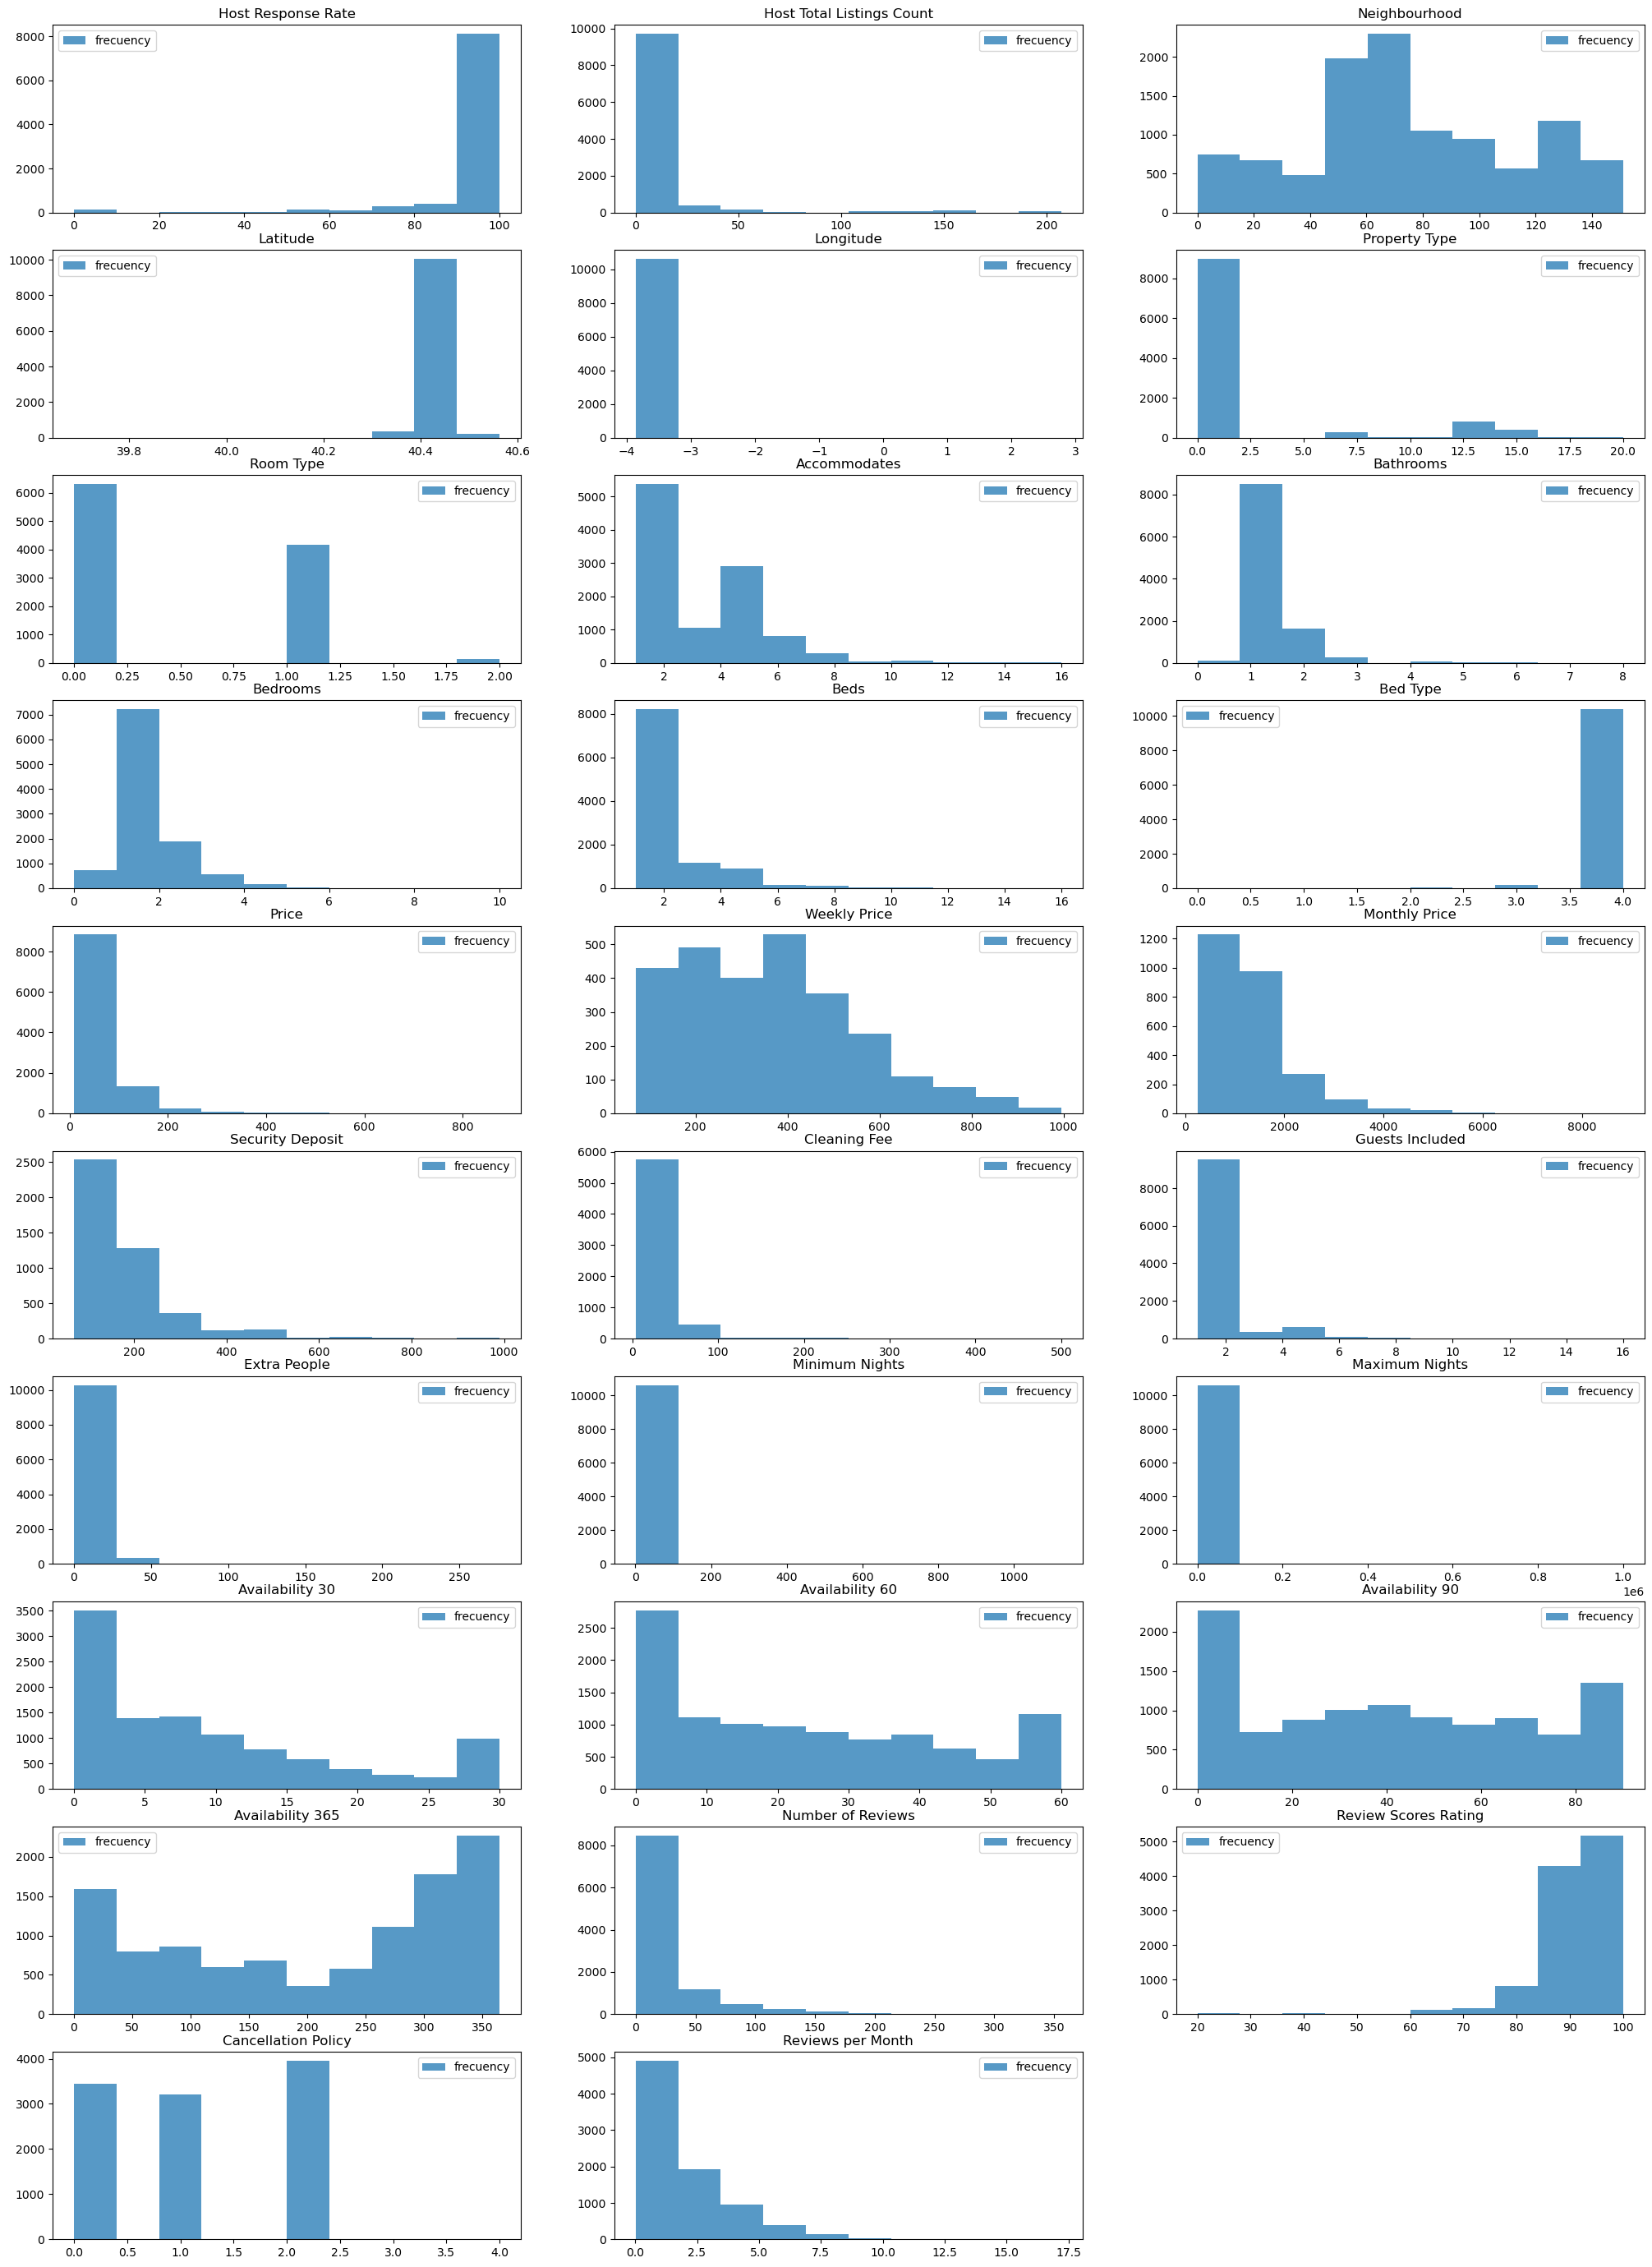

In [254]:
plt.figure(figsize=(25,35))

for i,feature in enumerate(airbnb_train.columns):
    plt.subplot(10,3,i+1)
    plt.hist(airbnb_train.loc[:,feature],density=0, alpha=0.75, label='frecuency')
    plt.legend()
    plt.title(feature)

plt.show()

Suena lógico que el precio semanal y precio mensual este muy correlacionado con la variable objetivo de precio, veamos esto con un scatter plot para confirmar que podemos eliminar estas columnas

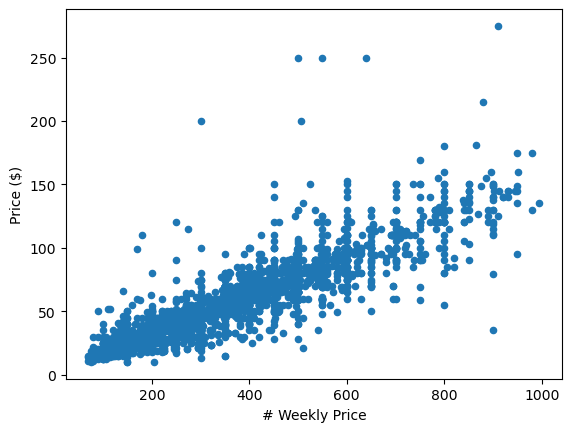

In [255]:
airbnb_train.plot(kind = 'scatter',x='Weekly Price',y = 'Price')
plt.xlabel('# Weekly Price')
plt.ylabel('Price ($)')
plt.show()

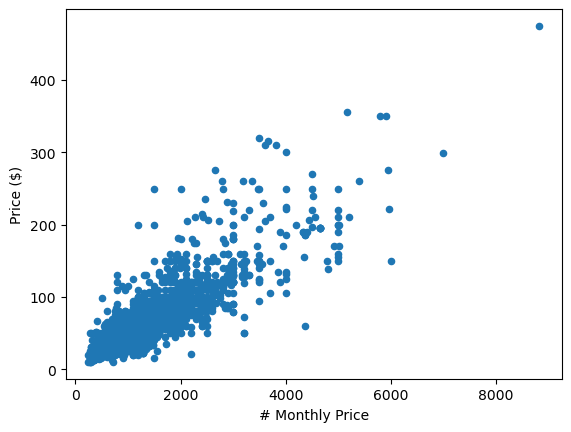

In [256]:
airbnb_train.plot(kind = 'scatter',x='Monthly Price',y = 'Price')
plt.xlabel('# Monthly Price')
plt.ylabel('Price ($)')
plt.show()

In [257]:
# Eliminamos Weekly Price y Monthly Price

airbnb_train = airbnb_train.drop(columns= ['Weekly Price', 'Monthly Price'])
airbnb_train.shape

(10617, 27)

Generemos la matriz de correlación entre variables

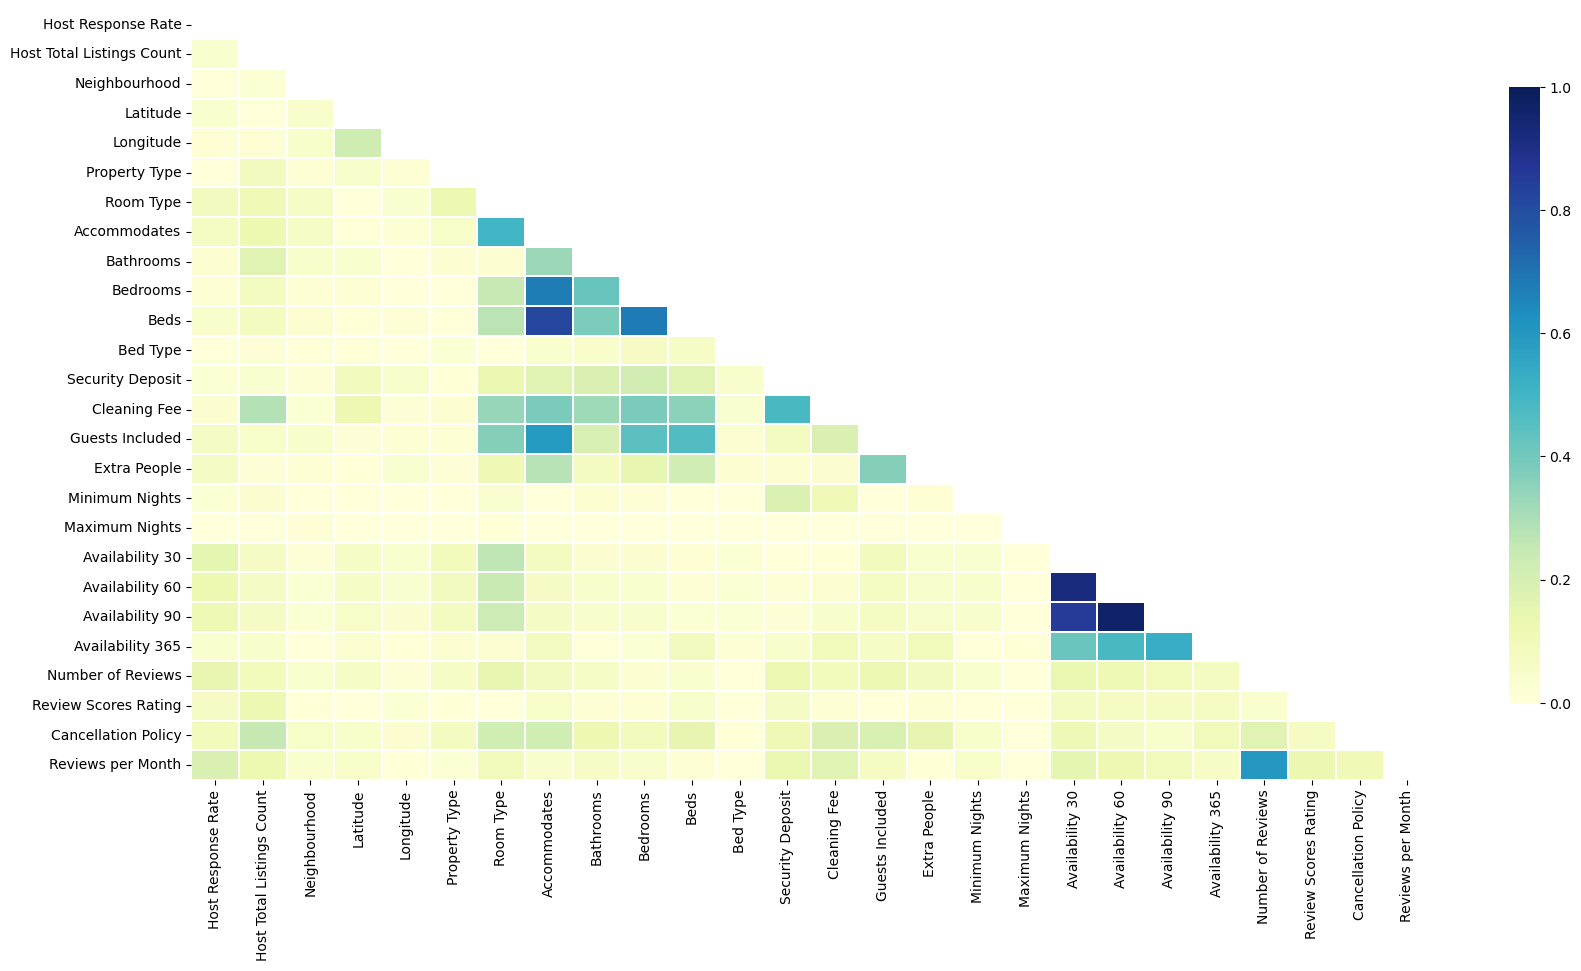

In [258]:
# Graficamos la matrix de correlación para observar el nivel de correlación entre variables

import seaborn as sns

corr = np.abs(airbnb_train.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Podemos ver algunas variables altamente correlacionadas como:

- 'Beds' vs 'Accommodates'
- 'Availability 60' vs 'Availability 30'
- 'Availability 90' vs 'Availability 60'
- 'Availability 90' vs 'Availability 30'

Lo cual puede producir un problema de colinealidad, afectando los algoritmos de ML que usemos en el análisis.

Tenemos otras pero en menor grado: 
- 'Beds' vs 'Bedrooms'
- 'Bedrooms' vs 'Accommodates'
- 'Reviews per Month' vs 'Number of Reviews'

Evaluemos el coeficiente de correlación (𝜌) entre estos atributos fijando un umbral superior (0.9) como criterio 
para saber si descartartamos alguna columna adicional. 

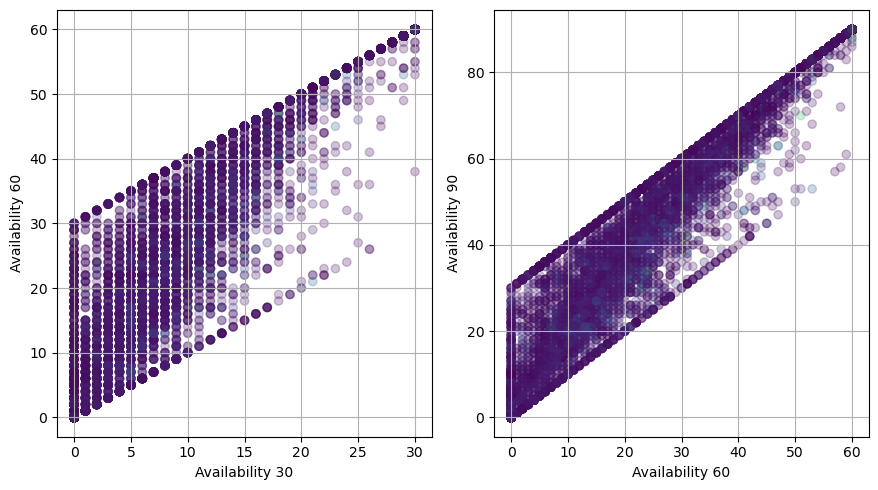

In [259]:
corr_matrix = airbnb_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.9
pairs = np.where(upper>threshold)
fx = airbnb_train.columns[pairs[0]]
fy = airbnb_train.columns[pairs[1]]

i=1
plt.figure(figsize=(22,5))
for f1,f2 in zip(fx,fy):
    
    plt.subplot(1,5,i)
    
    plt.scatter(airbnb_train[f1],airbnb_train[f2], c=airbnb_train['Price'], alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()
    
    i+=1
    
plt.show()

In [260]:
# Para evitar estas correlaciones altas en disponibilidad, eliminamos

airbnb_train = airbnb_train.drop(columns= ['Availability 60','Availability 90'])
airbnb_train.shape

(10617, 25)

In [261]:
# Veamos el resto de columnas con registros sin valores (NaN)
nan_counts = airbnb_train.isna().sum()

for column, count in nan_counts.items():
    print(f'{column}: {count}')

Host Response Rate: 1360
Host Total Listings Count: 3
Neighbourhood: 0
Latitude: 0
Longitude: 0
Property Type: 0
Room Type: 0
Accommodates: 0
Bathrooms: 34
Bedrooms: 18
Beds: 37
Bed Type: 0
Price: 6
Security Deposit: 6137
Cleaning Fee: 4346
Guests Included: 0
Extra People: 0
Minimum Nights: 0
Maximum Nights: 0
Availability 30: 0
Availability 365: 0
Number of Reviews: 0
Review Scores Rating: 0
Cancellation Policy: 0
Reviews per Month: 2232


In [262]:
# Imputación de valores faltantes utilizando la media para las variables que siguen una distribución normal o parecida

airbnb_train['Host Response Rate'].fillna(airbnb_train['Host Response Rate'].median(), inplace=True)
airbnb_train['Host Total Listings Count'].fillna(airbnb_train['Host Total Listings Count'].median(), inplace=True)
airbnb_train['Price'].fillna(airbnb_train['Price'].median(), inplace=True)
airbnb_train['Security Deposit'].fillna(airbnb_train['Security Deposit'].median(), inplace=True)
airbnb_train['Cleaning Fee'].fillna(airbnb_train['Cleaning Fee'].median(), inplace=True)
airbnb_train['Reviews per Month'].fillna(airbnb_train['Reviews per Month'].median(), inplace=True)

# Imputación de valores faltantes utilizando la moda para las variables que son categoricas o siguen valores discretos
airbnb_train['Bathrooms'].fillna(airbnb_train['Bathrooms'].mode()[0], inplace=True)
airbnb_train['Bedrooms'].fillna(airbnb_train['Bedrooms'].mode()[0], inplace=True)
airbnb_train['Beds'].fillna(airbnb_train['Beds'].mode()[0], inplace=True)

In [263]:
print(airbnb_train.isna().sum())

Host Response Rate           0
Host Total Listings Count    0
Neighbourhood                0
Latitude                     0
Longitude                    0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Bed Type                     0
Price                        0
Security Deposit             0
Cleaning Fee                 0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Availability 30              0
Availability 365             0
Number of Reviews            0
Review Scores Rating         0
Cancellation Policy          0
Reviews per Month            0
dtype: int64


#### Eliminación de outliers

Viendo los histogramas de arriba podemos ver posibles outliers en algunas variables, como Bedrooms, Accommodates, Beds, Bathrooms y Security Deposit. Usemos  scatter plot y `value_counts`para estudiarlos.

In [264]:
#Caso Bedrooms

airbnb_train['Bedrooms'].value_counts().sort_index(ascending=True)

Bedrooms
0.0      724
1.0     7228
2.0     1876
3.0      564
4.0      157
5.0       43
6.0       12
7.0        6
8.0        3
10.0       4
Name: count, dtype: int64

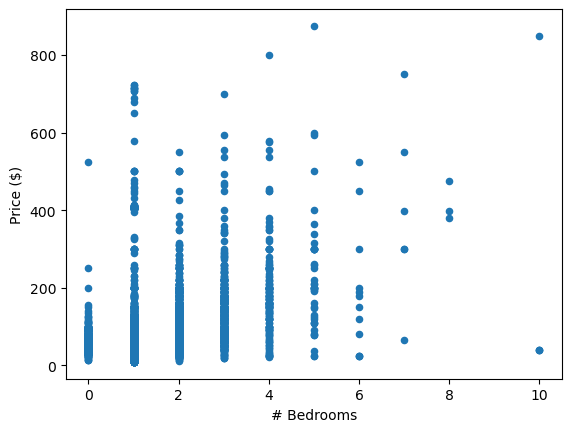

In [265]:
airbnb_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

Evaluemos la perdida de datos si eliminamos los outliers de Bedrooms por encima de 8

In [266]:
no_outliers_bedrooms = airbnb_train[airbnb_train['Bedrooms'] <=8]

print(
    f'Original: {airbnb_train.shape[0]} // '
    f'Modificado: {no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_train.shape[0] - no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {(((airbnb_train.shape[0] - no_outliers_bedrooms.shape[0])/airbnb_train.shape[0])*100):.2f}%')

Original: 10617 // Modificado: 10613
Diferencia: 4
Variación: 0.04%


In [267]:
# Caso Accommodates

airbnb_train['Accommodates'].value_counts().sort_index(ascending=True)

Accommodates
1     1556
2     3813
3     1049
4     2385
5      515
6      813
7      125
8      178
9       41
10      64
11      12
12      30
13       3
14       9
16      24
Name: count, dtype: int64

In [268]:
#Caso Beds

airbnb_train['Beds'].value_counts().sort_index(ascending=True)

Beds
1.0     5345
2.0     2888
3.0     1176
4.0      643
5.0      250
6.0      132
7.0       54
8.0       50
9.0       23
10.0      29
11.0       5
12.0       5
13.0       2
14.0       4
15.0       2
16.0       9
Name: count, dtype: int64

En ambos casos no parece haber outliers bien definidos

In [269]:
#Caso Bathrooms

airbnb_train['Bathrooms'].value_counts().sort_index(ascending=True)

Bathrooms
0.0      48
0.5      51
1.0    8143
1.5     380
2.0    1627
2.5      73
3.0     176
3.5      11
4.0      33
4.5      18
5.0      33
5.5       4
6.0      16
6.5       1
7.0       1
8.0       2
Name: count, dtype: int64

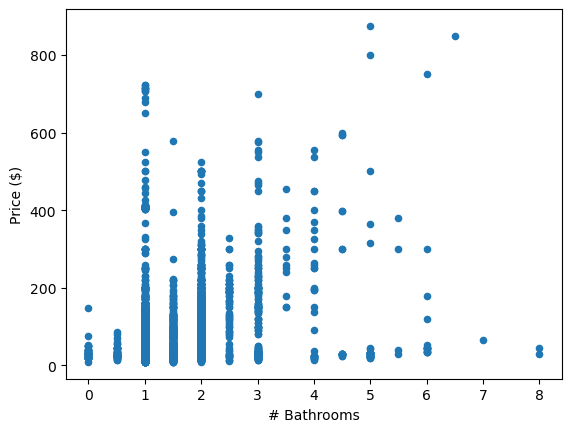

In [270]:
airbnb_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price ($)')
plt.show()

In [271]:
no_outliers_bathrooms = airbnb_train[airbnb_train['Bathrooms'] <=7]

print(
    f'Original: {airbnb_train.shape[0]} // '
    f'Modificado: {no_outliers_bathrooms.shape[0]}\nDiferencia: {airbnb_train.shape[0] - no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {(((airbnb_train.shape[0] - no_outliers_bathrooms.shape[0])/airbnb_train.shape[0])*100):.2f}%')

Original: 10617 // Modificado: 10615
Diferencia: 2
Variación: 0.02%


In [272]:
# Caso Security Deposit

airbnb_train['Security Deposit'].value_counts().sort_index(ascending=True)

Security Deposit
70.0      8
75.0      3
80.0     25
84.0      3
85.0     35
         ..
840.0     1
850.0     3
900.0     6
950.0     1
990.0     1
Name: count, Length: 95, dtype: int64

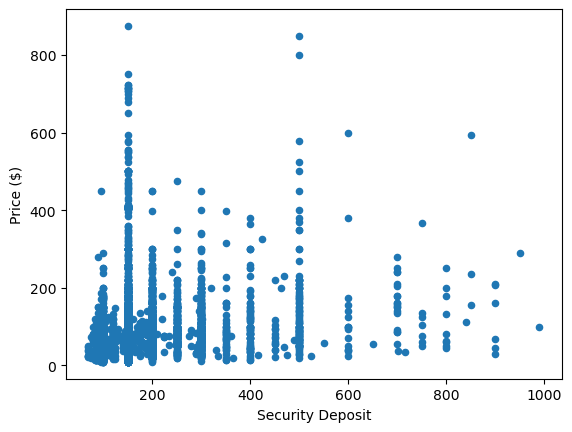

In [273]:
airbnb_train.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('Security Deposit')
plt.ylabel('Price ($)')
plt.show()

In [274]:
no_outliers_security = airbnb_train[airbnb_train['Security Deposit'] <=900.0]

print(
    f'Original: {airbnb_train.shape[0]} // '
    f'Modificado: {no_outliers_security.shape[0]}\nDiferencia: {airbnb_train.shape[0] - no_outliers_security.shape[0]}'
)
print(f'Variación: {(((airbnb_train.shape[0] - no_outliers_security.shape[0])/airbnb_train.shape[0])*100):.2f}%')

Original: 10617 // Modificado: 10615
Diferencia: 2
Variación: 0.02%


Eliminamos son los outliers encontrados de 'Security Deposit' y 'Bathrooms' que representan un valor muy bajo 0.02%. El resto de las columnas no las tocamos, porque la eliminacion podría hacer perder muestras significativas si alguna variable resulta ser predictora del precio.

In [275]:
airbnb_train = airbnb_train[airbnb_train['Security Deposit'] <=900.0]
airbnb_train = airbnb_train[airbnb_train['Bathrooms'] <=7]

In [276]:
airbnb_train.shape

(10613, 25)

## 4. Generación de nuevas características

Nuevas variables que pueden tener sentido para entender mejor el entorno del inmueble y que sean relevantes para calcular el precio del inmueble: 

- Relación entre Bedrooms y Bathrooms.
- Elevar al cuadrado el número de Bedrooms
- Relación entre Accomodates y Beds

In [277]:
# Relación entre Bedrooms y Bathrooms, apliquemos un producto

# airbnb_train['capacity'] = airbnb_train['Bathrooms'] + airbnb_train['Bedrooms']
airbnb_train['bathrooms_per_bedrooms'] = airbnb_train['Bathrooms'] * airbnb_train['Bedrooms']

In [278]:
# Elevar al cuadrado el número de Bedrooms

airbnb_train['bedrooms_squared'] = airbnb_train['Bedrooms'].apply(lambda x: x**2)

In [279]:
# Relación entre Accomodates y Beds

airbnb_train['beds_per_accommodates'] = airbnb_train['Beds'] / airbnb_train['Accommodates']

In [280]:
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10613 entries, 0 to 10616
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Response Rate         10613 non-null  float64
 1   Host Total Listings Count  10613 non-null  float64
 2   Neighbourhood              10613 non-null  int32  
 3   Latitude                   10613 non-null  float64
 4   Longitude                  10613 non-null  float64
 5   Property Type              10613 non-null  int32  
 6   Room Type                  10613 non-null  int32  
 7   Accommodates               10613 non-null  int64  
 8   Bathrooms                  10613 non-null  float64
 9   Bedrooms                   10613 non-null  float64
 10  Beds                       10613 non-null  float64
 11  Bed Type                   10613 non-null  int32  
 12  Price                      10613 non-null  float64
 13  Security Deposit           10613 non-null  float64


## 5. Modelado, cross-validation y estudio de resultados en train y test

Cargamos nuevamente los datos de train / test y aplicamos las mismas transformaciones.

In [281]:
# Carga de datos de Train
    
house_data_train = pd.read_csv('./data/airbnb_train.csv',sep=';', decimal='.')

# Imputación

house_data_train['Neighbourhood'] = house_data_train['Neighbourhood'].fillna(house_data_train['Neighbourhood Cleansed'])
house_data_train['Review Scores Rating'].fillna(house_data_train['Review Scores Rating'].mean(), inplace=True)
house_data_train['Host Response Rate'].fillna(house_data_train['Host Response Rate'].median(), inplace=True)
house_data_train['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)
house_data_train['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_train['Security Deposit'].fillna(house_data_train['Security Deposit'].median(), inplace=True)
house_data_train['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_train['Reviews per Month'].fillna(house_data_train['Reviews per Month'].median(), inplace=True)
house_data_train['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_train['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_train['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)

# Eliminamos las columnas no importantes segun analisis previo

house_data_train = house_data_train.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90' 
])

# Codificacion

le_Neighbourhood = LabelEncoder()
le_property = LabelEncoder()
le_Room = LabelEncoder()
le_bed = LabelEncoder()
le_Cancellation = LabelEncoder()

house_data_train['Neighbourhood'] = le_Neighbourhood.fit_transform(house_data_train['Neighbourhood'])
house_data_train['Property Type'] = le_property.fit_transform(house_data_train['Property Type'])
house_data_train['Room Type'] = le_Room.fit_transform(house_data_train['Room Type'])
house_data_train['Bed Type'] = le_bed.fit_transform(house_data_train['Bed Type'])
house_data_train['Cancellation Policy'] = le_Cancellation.fit_transform(house_data_train['Cancellation Policy'])

# Transformacion: movemos la variable objectivo 'Price' a la primera posición

cols = ['Price'] + [col for col in house_data_train if col != 'Price']
house_data_train = house_data_train[cols]

# Eliminamos outliers

house_data_train = house_data_train[house_data_train['Security Deposit'] <=900.0]
house_data_train = house_data_train[house_data_train['Bathrooms'] <=7]

# Generamos características

house_data_train['bathrooms_pro_bedrooms'] = house_data_train['Bathrooms'] * house_data_train['Bedrooms']
house_data_train['bedrooms_squared'] = house_data_train['Bedrooms'].apply(lambda x: x**2)
house_data_train['beds_per_accommodates'] = house_data_train['Beds'] / house_data_train['Accommodates']

In [282]:
house_data_train.shape

(10613, 28)

Lo mismo para test:

In [283]:
# Carga de datos de Test
    
house_data_test = pd.read_csv('./data/airbnb_test.csv',sep=';', decimal='.')

# Imputación con loss datos de Train

house_data_test['Neighbourhood'] = house_data_test['Neighbourhood'].fillna(house_data_test['Neighbourhood Cleansed'])
house_data_test['Review Scores Rating'].fillna(house_data_train['Review Scores Rating'].mean(), inplace=True)
house_data_test['Host Response Rate'].fillna(house_data_train['Host Response Rate'].median(), inplace=True)
house_data_test['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)
house_data_test['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_test['Security Deposit'].fillna(house_data_train['Security Deposit'].median(), inplace=True)
house_data_test['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_test['Reviews per Month'].fillna(house_data_train['Reviews per Month'].median(), inplace=True)
house_data_test['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_test['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_test['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)

# Eliminamos las columnas no importantes segun analisis previo

house_data_test = house_data_test.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90' 
])

# Codificacion

le_Neighbourhood = LabelEncoder()
le_property = LabelEncoder()
le_Room = LabelEncoder()
le_bed = LabelEncoder()
le_Cancellation = LabelEncoder()

house_data_test['Neighbourhood'] = le_Neighbourhood.fit_transform(house_data_test['Neighbourhood'])
house_data_test['Property Type'] = le_property.fit_transform(house_data_test['Property Type'])
house_data_test['Room Type'] = le_Room.fit_transform(house_data_test['Room Type'])
house_data_test['Bed Type'] = le_bed.fit_transform(house_data_test['Bed Type'])
house_data_test['Cancellation Policy'] = le_Cancellation.fit_transform(house_data_test['Cancellation Policy'])

# Transformacion: movemos la variable objectivo 'Price' a la primera posición 

cols = ['Price'] + [col for col in house_data_test if col != 'Price']
house_data_test = house_data_test[cols]

# Eliminamos outliers en Bedrooms

house_data_test = house_data_test[house_data_test['Security Deposit'] <=900.0]
house_data_test = house_data_test[house_data_test['Bathrooms'] <=7]

# Generamos características

house_data_test['bathrooms_pro_bedrooms'] = house_data_test['Bathrooms'] * house_data_test['Bedrooms']
house_data_test['bedrooms_squared'] = house_data_test['Bedrooms'].apply(lambda x: x**2)
house_data_test['beds_per_accommodates'] = house_data_test['Beds'] / house_data_test['Accommodates']

In [284]:
house_data_test.shape

(2654, 28)

Preparamos los datos para sklearn

In [285]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [286]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (10613, 27)
Datos test:  (2654, 27)


Normalizamos los datos

In [287]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)

# Transformo train y test con el mismo scaler
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test) 

Primer modelo regresión linear, cross validation con Lasso y revisión de los parámetros

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.47148663634573934; total time=   0.0s
[CV] END ..........................alpha=0.47148663634573934; total time=   0.0s
[CV] END ..........................alpha=0.4714

[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END ...........................alpha=56898660.290183045; total time=   0.0s
[CV] END ...........................alpha=56898660.290183045; total time=   0.0s
[CV] END ...........................alpha=56898660.290183045; total time=   0.0s
[CV] END ...................

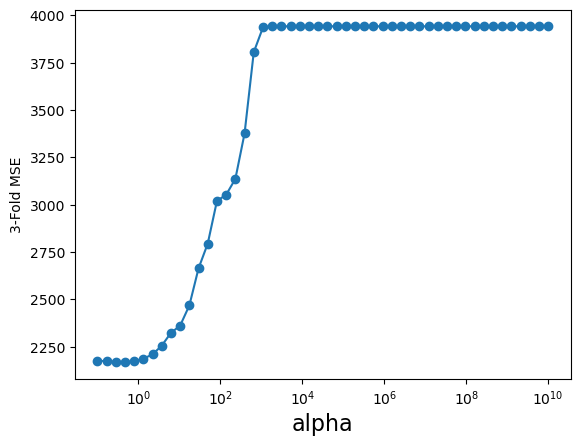

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [289]:
# Con el valor óptimo de alpha corremos lasso para obtener MSE y RMSE

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data_train.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.13e+03
MSE Modelo Lasso (test) : 1.74e+03
RMSE Modelo Lasso (train): 46.1
RMSE Modelo Lasso (test) : 41.7
Host Response Rate 0.14543214641845775
Host Total Listings Count 1.8849620942441223
Neighbourhood 1.4247358916205712
Latitude 3.335160905451257
Longitude 0.44926550338117854
Property Type 0.0
Room Type -12.268924391808362
Accommodates 10.962141589140826
Bathrooms 0.0
Bedrooms 0.0
Beds 0.0
Bed Type 0.0
Security Deposit 2.4108467531546385
Cleaning Fee 15.56113329089698
Guests Included 2.4251332320832413
Extra People -3.446793595489125
Minimum Nights -0.6704527446806144
Maximum Nights 0.0
Availability 30 8.931075206983893
Availability 365 0.0
Number of Reviews -1.405240352900829
Review Scores Rating 3.2649817931049987
Cancellation Policy -2.5460213734737085
Reviews per Month -1.0256449908802256
bathrooms_pro_bedrooms 16.78537541717698
bedrooms_squared -1.1924931231752136
beds_per_accommodates -3.6407911362952694


Si nos enfocamos en el resultado del RMSE que esta en la misma unidad que la variable objectivo, su valor (train=46.1/test=41.8) esta muy alto, considerando que la media del precio es 67.43. Necesitamos mejorar los resultados. 

Vamos a probar reducir características

Empecemos con el metodo de filtrado para seleccionar características y reducir atributos en nuestro dataset, es decir reducir complejidad

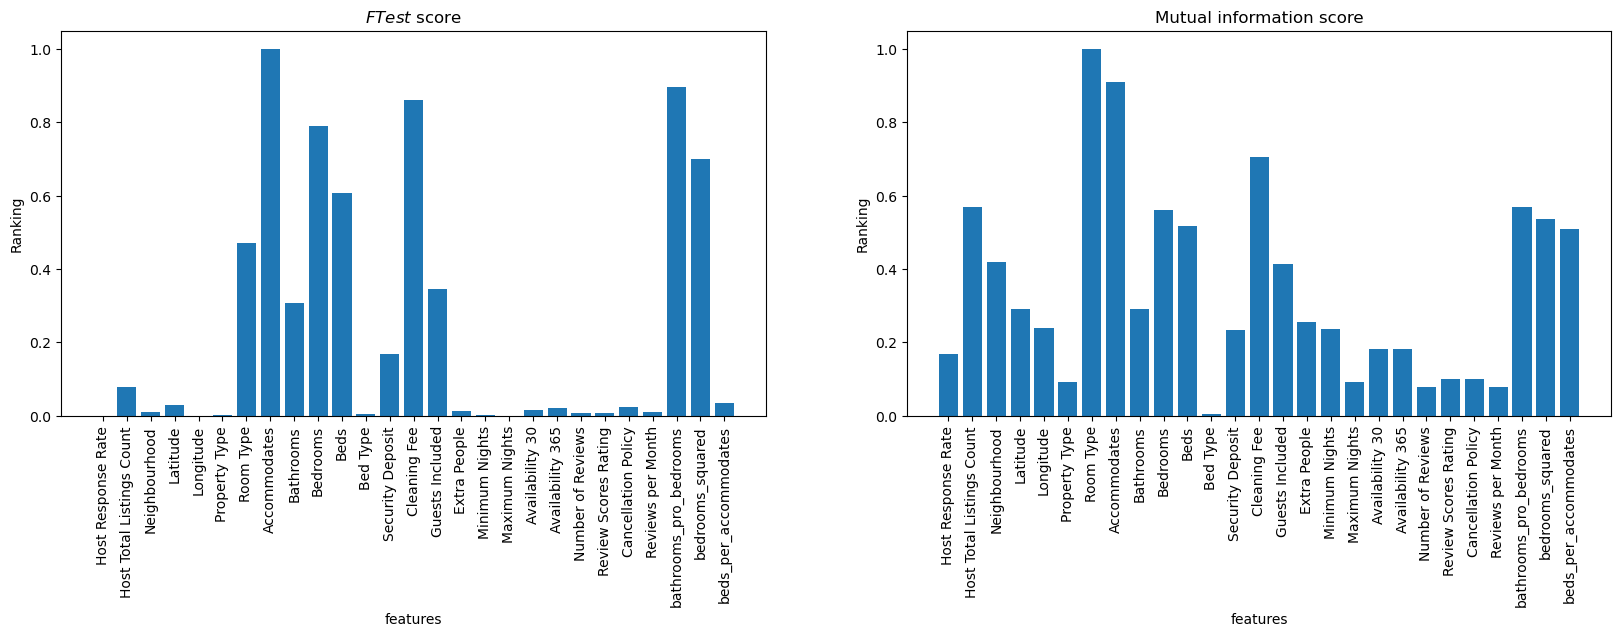

In [290]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data_train.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data_train.columns[1:]

# estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# visualización
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Podemos inferir algunas variables que se destacan en ambas gráficas (ej: 'Accommodates', 'Cleaning Fee', 'bathrooms_pro_bedrooms', etc), pero hay otras que difieren en nivel en ambos graficos y no es tan concluyente la decision(ej: 'Extra People', 'beds_per_accommodates') .

También podemos usar la propiedad de los algoritmos basados en árboles para medir la importancia de las variables

best mean cross-validation score: 0.462
best parameters: {'max_depth': 5}


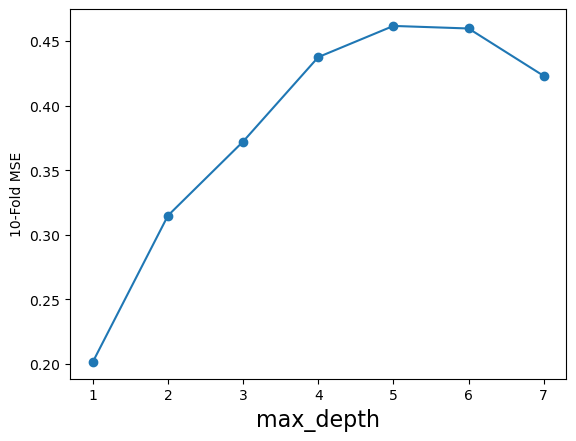

In [291]:
# Arbol de decisión individual

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,8)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [292]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.5513480927203134
Test:  0.47219460522328704


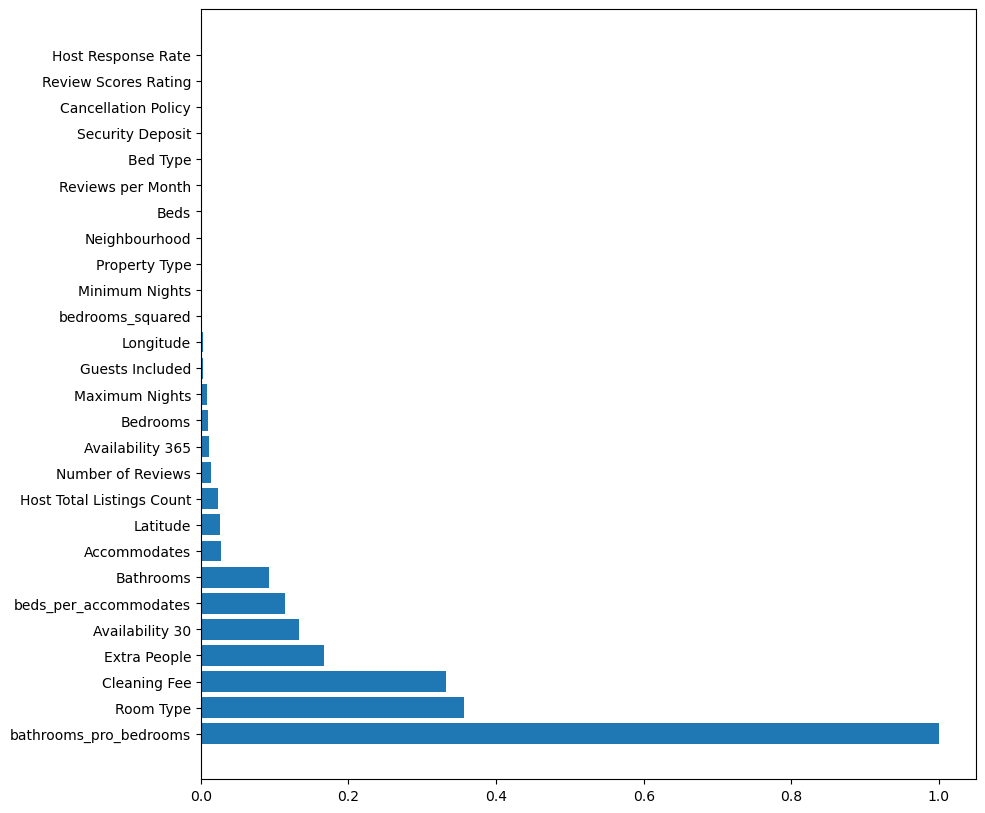

In [293]:
features = house_data_train.drop(columns=['Price']).columns.tolist()
features_array = np.array(features)

importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features_array[indices])
plt.show()

De acuerdo a la grafica pudieramos seleccionar como variables mas importantes, de 'Maximun Nights' hacia abajo. Una reducción a de 27 a 14 variables. Hagamos una prueba nuevamente regresion lineal 

In [294]:
# Carga de datos de train con estos ajustes
    
house_data_train = pd.read_csv('./data/airbnb_train.csv',sep=';', decimal='.')

# Imputación con los datos de Train

house_data_train['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_train['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_train['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_train['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_train['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)
house_data_train['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)

# Generamos características

house_data_train['bathrooms_pro_bedrooms'] = house_data_train['Bathrooms'] * house_data_train['Bedrooms']
house_data_train['beds_per_accommodates'] = house_data_train['Beds'] / house_data_train['Accommodates']

# Codificacion
le_Room = LabelEncoder()
house_data_train['Room Type'] = le_Room.fit_transform(house_data_train['Room Type'])

# Transformacion 

cols = ['Price'] + [col for col in house_data_train if col != 'Price']
house_data_train = house_data_train[cols]

# Eliminamos outliers en Bathroomd

house_data_train = house_data_train[house_data_train['Bathrooms'] <=7]

In [295]:
# Carga de datos de test con estos ajustes
    
house_data_test = pd.read_csv('./data/airbnb_test.csv',sep=';', decimal='.')

# Imputación con los datos de Train

house_data_test['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_test['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_test['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_test['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_test['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)
house_data_test['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)

# Generamos características

house_data_test['bathrooms_pro_bedrooms'] = house_data_test['Bathrooms'] * house_data_test['Bedrooms']
house_data_test['beds_per_accommodates'] = house_data_test['Beds'] / house_data_test['Accommodates']

# Codificacion
le_Room = LabelEncoder()
house_data_test['Room Type'] = le_Room.fit_transform(house_data_test['Room Type'])

# Transformacion 

cols = ['Price'] + [col for col in house_data_test if col != 'Price']
house_data_test = house_data_test[cols]

# Eliminamos outliers en Bathrooms

house_data_test = house_data_test[house_data_test['Bathrooms'] <=7]

In [296]:
# Eliminamos en Train las columnas no importantes, incluyendo las defininidas en la selección de características usando el arbol

house_data_train = house_data_train.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90', 'Host Response Rate', 'Longitude', 
    'Property Type', 'Bed Type', 'Security Deposit', 'Minimum Nights', 'Guests Included',
    'Review Scores Rating', 'Cancellation Policy', 'Reviews per Month','Beds', 'Neighbourhood'
])

In [297]:
# Eliminamos en Test las columnas no importantes segun selección de características usando el arbol

house_data_test = house_data_test.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90', 'Host Response Rate', 'Longitude', 
    'Property Type', 'Bed Type', 'Security Deposit', 'Minimum Nights', 'Guests Included',
    'Review Scores Rating', 'Cancellation Policy', 'Reviews per Month','Beds', 'Neighbourhood'
])


In [298]:
print(house_data_train.shape)
print(house_data_test.shape)

(10615, 15)
(2654, 15)


In [299]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [300]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)

# Transformo train y test con el mismo scaler
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test) 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.28117686979742307; total time=   0.0s
[CV] END ..........................alpha=0.47148663634573934; total time=   0.0s
[CV] END ..........................alpha=0.47148663634573934; total time=   0.0s
[CV] END ..........................alpha=0.4714

[CV] END ............................alpha=7196856.730011513; total time=   0.0s
[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=12067926.406393263; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END ...........................alpha=20235896.477251556; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END .............................alpha=33932217.7189533; total time=   0.0s
[CV] END ...........................alpha=56898660.290183045; total time=   0.0s
[CV] END ...........................alpha=56898660.290183045; total time=   0.0s
[CV] END ...................

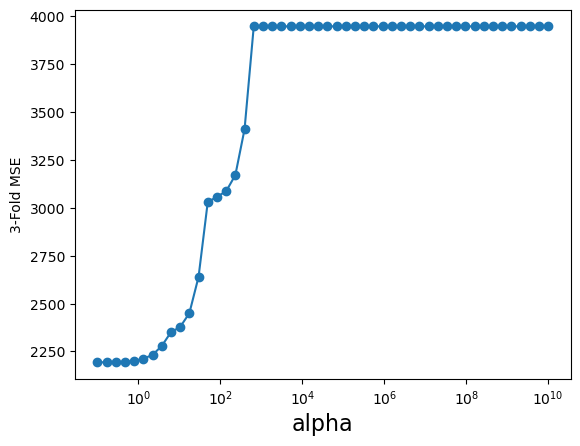

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [302]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data_train.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.17e+03
MSE Modelo Lasso (test) : 1.76e+03
RMSE Modelo Lasso (train): 46.6
RMSE Modelo Lasso (test) : 42
Host Total Listings Count 0.9722430542312979
Latitude 3.5828600849719825
Room Type -12.862132568540412
Accommodates 11.28919550441075
Bathrooms 0.5358046988697256
Bedrooms 0.0
Cleaning Fee 16.25322286530687
Extra People -3.2628393312628767
Maximum Nights 0.0
Availability 30 9.22346470784925
Availability 365 -0.1485298659580871
Number of Reviews -2.4783218350079106
bathrooms_pro_bedrooms 16.492005663884218
beds_per_accommodates -3.9353884290282846


Aunque simplicamos el modelo con una reduccion a 14 caracteristicas las metricas MSE y RMSE no mejoraron mucho, son muy parecidas


Probemos otro modelo Random Forest

best mean cross-validation score: 0.621
best parameters: {'max_depth': 10}


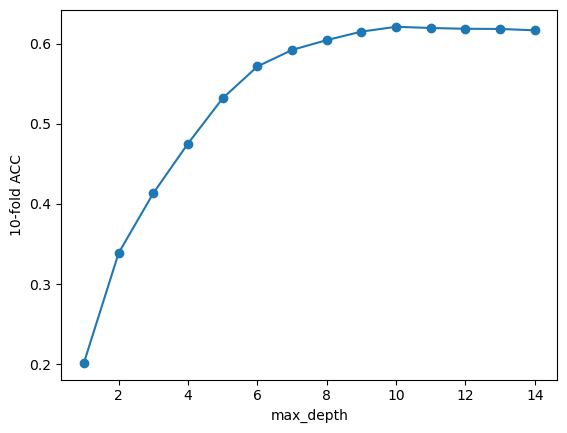

In [303]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [304]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.7779366437134656
Test:  0.6247003340252819


Probemos nuevamente Random Forest con las 27 variables iniciales sin la reduccion, para comparar con estos resultados

In [348]:
# Carga de datos de Train
    
house_data_train = pd.read_csv('./data/airbnb_train.csv',sep=';', decimal='.')

house_data_train['Neighbourhood'] = house_data_train['Neighbourhood'].fillna(house_data_train['Neighbourhood Cleansed'])
house_data_train['Review Scores Rating'].fillna(house_data_train['Review Scores Rating'].mean(), inplace=True)
house_data_train['Host Response Rate'].fillna(house_data_train['Host Response Rate'].median(), inplace=True)
house_data_train['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)
house_data_train['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_train['Security Deposit'].fillna(house_data_train['Security Deposit'].median(), inplace=True)
house_data_train['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_train['Reviews per Month'].fillna(house_data_train['Reviews per Month'].median(), inplace=True)
house_data_train['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_train['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_train['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)

house_data_train = house_data_train.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90' 
])

le_Neighbourhood = LabelEncoder()
le_property = LabelEncoder()
le_Room = LabelEncoder()
le_bed = LabelEncoder()
le_Cancellation = LabelEncoder()

house_data_train['Neighbourhood'] = le_Neighbourhood.fit_transform(house_data_train['Neighbourhood'])
house_data_train['Property Type'] = le_property.fit_transform(house_data_train['Property Type'])
house_data_train['Room Type'] = le_Room.fit_transform(house_data_train['Room Type'])
house_data_train['Bed Type'] = le_bed.fit_transform(house_data_train['Bed Type'])
house_data_train['Cancellation Policy'] = le_Cancellation.fit_transform(house_data_train['Cancellation Policy'])

cols = ['Price'] + [col for col in house_data_train if col != 'Price']
house_data_train = house_data_train[cols]

house_data_train = house_data_train[house_data_train['Security Deposit'] <=900.0]
house_data_train = house_data_train[house_data_train['Bathrooms'] <=7]

house_data_train['bathrooms_pro_bedrooms'] = house_data_train['Bathrooms'] * house_data_train['Bedrooms']
house_data_train['bedrooms_squared'] = house_data_train['Bedrooms'].apply(lambda x: x**2)
house_data_train['beds_per_accommodates'] = house_data_train['Beds'] / house_data_train['Accommodates']

In [349]:
# Carga de datos de Test
    
house_data_test = pd.read_csv('./data/airbnb_test.csv',sep=';', decimal='.')

house_data_test['Neighbourhood'] = house_data_test['Neighbourhood'].fillna(house_data_test['Neighbourhood Cleansed'])
house_data_test['Review Scores Rating'].fillna(house_data_train['Review Scores Rating'].mean(), inplace=True)
house_data_test['Host Response Rate'].fillna(house_data_train['Host Response Rate'].median(), inplace=True)
house_data_test['Host Total Listings Count'].fillna(house_data_train['Host Total Listings Count'].median(), inplace=True)
house_data_test['Price'].fillna(house_data_train['Price'].median(), inplace=True)
house_data_test['Security Deposit'].fillna(house_data_train['Security Deposit'].median(), inplace=True)
house_data_test['Cleaning Fee'].fillna(house_data_train['Cleaning Fee'].median(), inplace=True)
house_data_test['Reviews per Month'].fillna(house_data_train['Reviews per Month'].median(), inplace=True)
house_data_test['Bathrooms'].fillna(house_data_train['Bathrooms'].mode()[0], inplace=True)
house_data_test['Bedrooms'].fillna(house_data_train['Bedrooms'].mode()[0], inplace=True)
house_data_test['Beds'].fillna(house_data_train['Beds'].mode()[0], inplace=True)

house_data_test = house_data_test.drop(columns= [
    'ID', 'Scrape ID', 'Host ID','Host Name', 'Name','Host Location',
    'Listing Url', 'Thumbnail Url','Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Thumbnail Url','Host Picture Url',
    'Experiences Offered', 'Host Acceptance Rate', 'Has Availability',
    'Jurisdiction Names', 'Summary', 'Space', 'Description', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 
    'Host Neighbourhood', 'Host Verifications', 'Street', 'Amenities', 'Features',
    'Host Response Time', 'Host Listings Count', 'Calculated host listings count', 
    'Geolocation', 'Zipcode', 'Host Since', 'Last Scraped', 'Calendar Updated', 
    'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Square Feet', 
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Review Scores Accuracy',
    'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
    'Review Scores Location','Review Scores Value', 'Weekly Price', 'Monthly Price',
    'Availability 60', 'Availability 90' 
])

le_Neighbourhood = LabelEncoder()
le_property = LabelEncoder()
le_Room = LabelEncoder()
le_bed = LabelEncoder()
le_Cancellation = LabelEncoder()

house_data_test['Neighbourhood'] = le_Neighbourhood.fit_transform(house_data_test['Neighbourhood'])
house_data_test['Property Type'] = le_property.fit_transform(house_data_test['Property Type'])
house_data_test['Room Type'] = le_Room.fit_transform(house_data_test['Room Type'])
house_data_test['Bed Type'] = le_bed.fit_transform(house_data_test['Bed Type'])
house_data_test['Cancellation Policy'] = le_Cancellation.fit_transform(house_data_test['Cancellation Policy'])

cols = ['Price'] + [col for col in house_data_test if col != 'Price']
house_data_test = house_data_test[cols]

house_data_test = house_data_test[house_data_test['Security Deposit'] <=900.0]
house_data_test = house_data_test[house_data_test['Bathrooms'] <=7]

house_data_test['bathrooms_pro_bedrooms'] = house_data_test['Bathrooms'] * house_data_test['Bedrooms']
house_data_test['bedrooms_squared'] = house_data_test['Bedrooms'].apply(lambda x: x**2)
house_data_test['beds_per_accommodates'] = house_data_test['Beds'] / house_data_test['Accommodates']

In [350]:
print(house_data_train.shape)
print(house_data_test.shape)

(10613, 28)
(2654, 28)


In [308]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [351]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)

# Transformo train y test con el mismo scaler
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test) 

best mean cross-validation score: 0.612
best parameters: {'max_depth': 14}


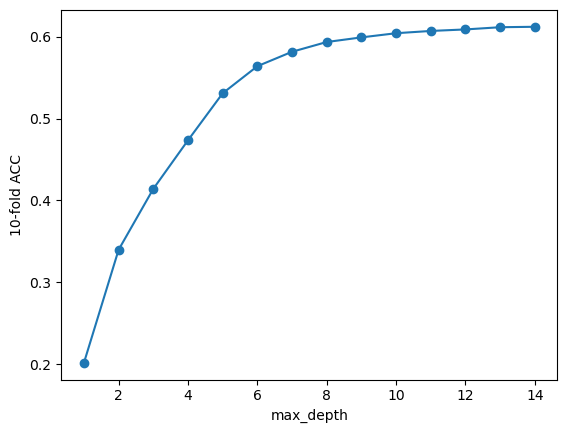

In [352]:
# Random Forest 2 corrida

from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [353]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8998203287008443
Test:  0.6362970502142085


Mejores prestaciones que el anterior. Veamos la importancia de las caracteristicas con Random Forest

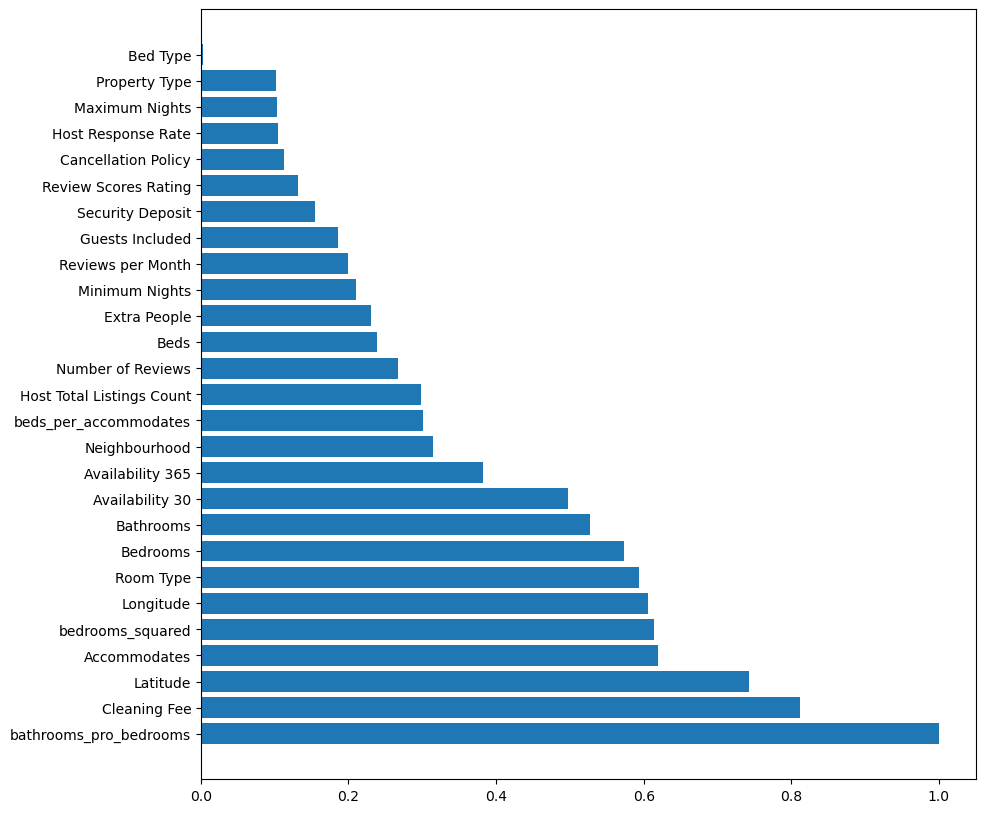

In [354]:
features = house_data_train.drop(columns=['Price']).columns.tolist()
features_array = np.array(features)

importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features_array[indices])
plt.show()

Sin duda podemos mejorar los resultados, quizas con regularización o seleccionando un combinación diferente de caracteristicas con otro metodo. Sin embargo corramos otros modelos como Bagging, Gradient Boosting y SVR para comparar resultados

best mean cross-validation score: 0.611
best parameters: {'base_estimator__max_depth': 14}


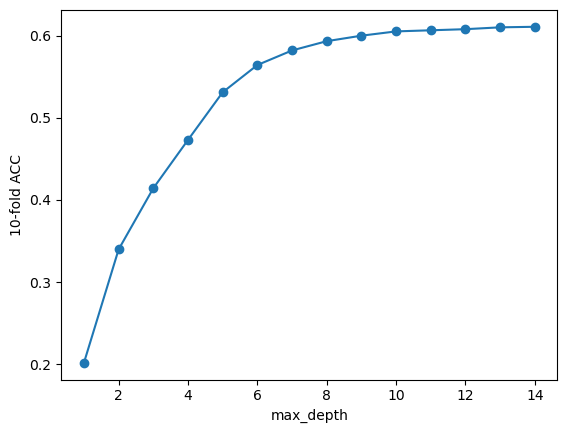

In [355]:
# Modelo con Bagging

from sklearn.ensemble import BaggingRegressor

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [356]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.9191330025709301
Test:  0.6068611150157666


In [357]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  21.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  18.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  19.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  35.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  33.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  33.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  54.9s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  51.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  59.2s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time= 1.1min
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time= 1.2min
[CV] END ...............learning_rate=0.1, n_esti

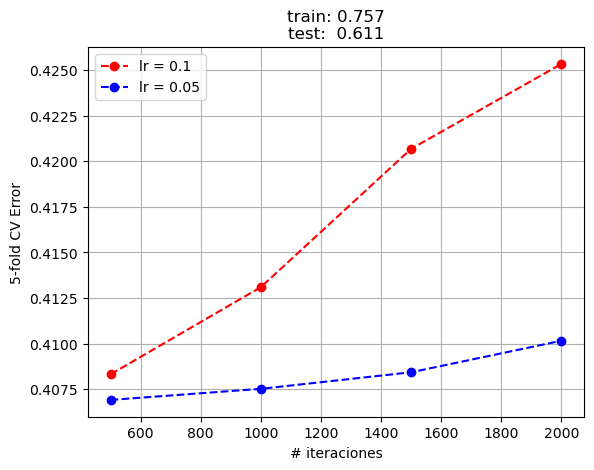

In [358]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [359]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.7570271569990576
Test:  0.6093121796591203


In [360]:
# SVM

from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 4)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=  10.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=  16.2s
[CV] END ................................C=0.01, gamma=1e-05; total time=  15.7s
[CV] END ................................C=0.01, gamma=1e-05; total time=  13.4s
[CV] END ................................C=0.01, gamma=1e-05; total time=  10.6s
[CV] END ................................C=0.01, gamma=0.001; total time=   9.5s
[CV] END ................................C=0.01, gamma=0.001; total time=  11.1s
[CV] END ................................C=0.01, gamma=0.001; total time=  10.5s
[CV] END ................................C=0.01, gamma=0.001; total time=  10.9s
[CV] END ................................C=0.01, gamma=0.001; total time=  10.2s
[CV] END ..................................C=0.01, gamma=0.1; total time=  10.3s
[CV] END ..................................C=0.

[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   9.5s
[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=  10.2s
[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   9.6s
[CV] END ..................C=1.6681005372000592, gamma=1e-05; total time=   9.8s
[CV] END ..................C=1.6681005372000592, gamma=0.001; total time=   9.4s
[CV] END ..................C=1.6681005372000592, gamma=0.001; total time=   9.3s
[CV] END ..................C=1.6681005372000592, gamma=0.001; total time=  10.5s
[CV] END ..................C=1.6681005372000592, gamma=0.001; total time=  14.4s
[CV] END ..................C=1.6681005372000592, gamma=0.001; total time=  11.9s
[CV] END ....................C=1.6681005372000592, gamma=0.1; total time=   9.2s
[CV] END ....................C=1.6681005372000592, gamma=0.1; total time=   9.3s
[CV] END ....................C=1.6681005372000592, gamma=0.1; total time=   9.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.e-05, 1.e-03, 1.e-01, 1.e+01])},
             verbose=2)

best mean cross-validation score: 0.449
best parameters: {'C': 100.0, 'gamma': 0.1}
Gamma en la gráfica:  -1.0
C en la gráfica:  2.0


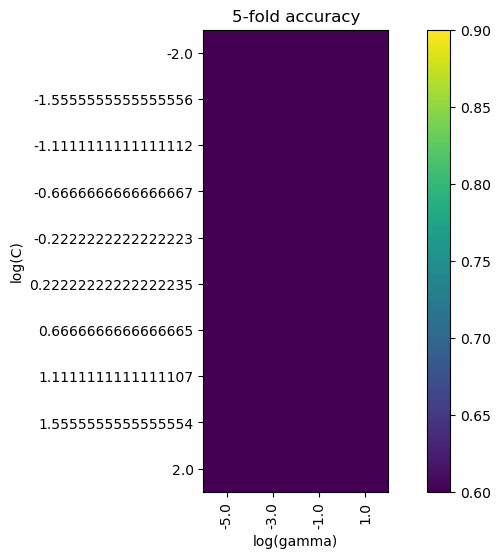

In [361]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("Gamma en la gráfica: ", np.log10(grid.best_params_['gamma']))
print("C en la gráfica: ", np.log10(grid.best_params_['C']))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [362]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print(f'Acc (TEST): {svmModel.score(XtestScaled,y_test):0.2f}')

Acc (TEST): 0.52


Resumen de modelos aplicados y metricas resultantes

TreeModel 
Train:  0.5513480927203134
Test:  0.4812121163461571

RandomForest
Train:  0.8990836046233255
Test:  0.6395901440232641

Bagging
Train:  0.9191330025709301
Test:  0.6068611150157666

Gradient Boosting
Train:  0.7570271569990576
Test:  0.6097171001330846

SVM
Acc (Test): 0.52 

Aunque esperaba iterar mas y conseguir mejores prestaciones, a continuación mi conclusión final del estudio.

De acuerdo a los resultados obtenidos el mejor modelo resulta ser Randon Forest, al ofrecer una mejor metrica de accurancy (sobre todo en Test) para predecir el precio del inmueble. 

Random Forest ayuda a simplificar el modelo al ser mas acertivo (que otros metodos) en la seleccion de las caracteristicas relevantes o predictoras del precio, asi como también ofrece una mejor generalizacion de los datos reduciendo el overfitting.  